# Readme

In [1]:
# import the required librarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Read in the Train Data from the CSV file
df= pd.read_csv("train.csv")

# Clean the data

In [2]:
# Let's take a look at a sample of the dataset
df.sample(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
694,695,0,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,NaN,S
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
491,492,0,3,"Windelov, Mr. Einar",male,21.0,0,0,SOTON/OQ 3101317,7.2500,NaN,S
536,537,0,1,"Butt, Major. Archibald Willingham",male,45.0,0,0,113050,26.5500,B38,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
# We see some missing values in the Age column and a lot of missing values in the Cabin column.
# Lets find out how many missing values each column contains
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
#Seeing that vast majority of records does not have values in the Cabin column I decide to drop this column entirely
#I also drop the Ticket column as this does not appear to be useful information
df.drop(["Cabin","Ticket"], axis=1, inplace=True)

In [5]:
#Embarked only has 2 missing values so we can impute the missing values based on the most frequent values in this column
from sklearn.impute import SimpleImputer 
emb_imp = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

#Save the imputed column back into the dataset
df["Embarked"] = emb_imp.fit_transform(df[["Embarked"]])

In [6]:
#Check for patterns on rows that do not contain Age values
df[df["Age"].isnull()].sample(15) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
420,421,0,3,"Gheorgheff, Mr. Stanio",male,NaN,0,0,7.8958,C
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,7.7500,Q
306,307,1,1,"Fleming, Miss. Margaret",female,NaN,0,0,110.8833,C
547,548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,13.8625,C
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,30.5000,S
738,739,0,3,"Ivanoff, Mr. Kanio",male,NaN,0,0,7.8958,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,7.3125,S
611,612,0,3,"Jardin, Mr. Jose Neto",male,NaN,0,0,7.0500,S
573,574,1,3,"Kelly, Miss. Mary",female,NaN,0,0,7.7500,Q
367,368,1,3,"Moussa, Mrs. (Mantoura Boulos)",female,NaN,0,0,7.2292,C


In [62]:
#No pattern or obvious similarities found on records that do not contain Age data.
# We will need to find another way to impute the age data.
# First we create a copy of the dataset 
df_imputed = df.copy()

# There are many ways to do this including using the "title" information contained in the names. However for simplicity sake
# We will use the 3 features in between which the median age values seem to differ quite a lot. 

# We create a view of the dataset grouped by Sex, SibSp and Parch that displays the median values. 
subview = df.groupby(['Sex', 'SibSp',"Parch"])['Age'].agg('median')

#Lets have a look at this view.
subview

Sex     SibSp  Parch
female  0      0        28.5
               1        22.0
               2        22.0
               3        24.0
               4        29.0
               5        40.0
        1      0        29.0
               1        31.0
               2        23.0
               3        51.0
               4        45.0
               5        38.5
               6        43.0
        2      0        35.5
               1         4.0
               2        19.5
               3        24.0
        3      0        31.5
               1         5.5
               2        16.0
        4      2         7.5
        5      2        16.0
        8      2         NaN
male    0      0        30.0
               1        36.5
               2        17.0
        1      0        30.0
               1        19.0
               2        25.0
               3        16.0
               4        52.0
               5        39.0
        2      0        28.0
               1      

In [8]:
# Males and females where SibSp == 8 do not have any age values. 
# Lets take a closer look
subset = df_imputed["SibSp"] == 8
df_imputed[subset]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,69.55,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,69.55,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,69.55,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,69.55,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,69.55,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,69.55,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,69.55,S


In [9]:
# Judging by the names it seems that these are all siblings traveling with 2 parents(Parch = 2) 
# making it very likely all are children. We will use the Age 13 to fill these NaN's
df_imputed.loc[subset, "Age"] = 13

In [10]:
# Have a "for" loop run over all rows in subview 
for i in subview.index:  
    # define the subset for each iteration
    subset = (df_imputed["Sex"] == i[0]) & (df_imputed["SibSp"] == i[1]) & (df_imputed["Parch"] == i[2])
    # Save the median age of the subset to records that contain Nan's in the Age column
    df_imputed.loc[subset, "Age"] = df_imputed[subset]["Age"].fillna(df_imputed[subset]["Age"].median())

In [11]:
df_imputed.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.380662,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.216903,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
# Fare/ Max shows a very high number in comparison to the rest of the values in that column
# Let's see if this is an error in the data
df_imputed[df_imputed["Fare"] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,512.3292,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,512.3292,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,512.3292,C


In [13]:
# We find 3 rows with this fare price making it likely that this is not an anomoly but a valid price. --> Moving on

# Explore and Enrich the Data

In [14]:
df_imputed.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036513,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.060103,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.344308,0.083081,0.018443,-0.549500
Age,0.036513,-0.060103,-0.344308,1.000000,-0.315340,-0.210301,0.084605
SibSp,-0.057527,-0.035322,0.083081,-0.315340,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.210301,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.084605,0.159651,0.216225,1.000000


In [15]:
#I want to display the numerical data in stacked barcharts. 
# To do so we need to reduce the amount of bins that are visible in the chart for the Age and Fare values

#Specify the bins/ranges and their corresponding labels to use for Age range Column values
age_bins = [0, 12,18,24,30,45,60,80 ]
age_labels = ["0-12","13-18", "19-24","25-30", "31-45","46-60","61-80"]

#Specify the bins/ranges and their corresponding labels to use for Fare range Column values
fare_bins = [0,13,26,45,70,120,600]
fare_labels = ["0-13","14-26","27-45","46-70","71-120","121+"] 

#Add new columns in the df that contains the Age_range category 
df["Age_range"] = pd.cut(df["Age"], age_bins, labels=age_labels, include_lowest=True)
df_imputed["Age_range"] = pd.cut(df_imputed["Age"], age_bins, labels=age_labels, include_lowest=True)
# df["fare_range"] = pd.cut(df["Fare"],fare_bins,labels=fare_labels, include_lowest=True)
df_imputed["fare_range"] = pd.cut(df_imputed["Fare"],fare_bins,labels=fare_labels, include_lowest=True)

Text(0.5, 0.98, 'Orange=survived - blue=not survived')

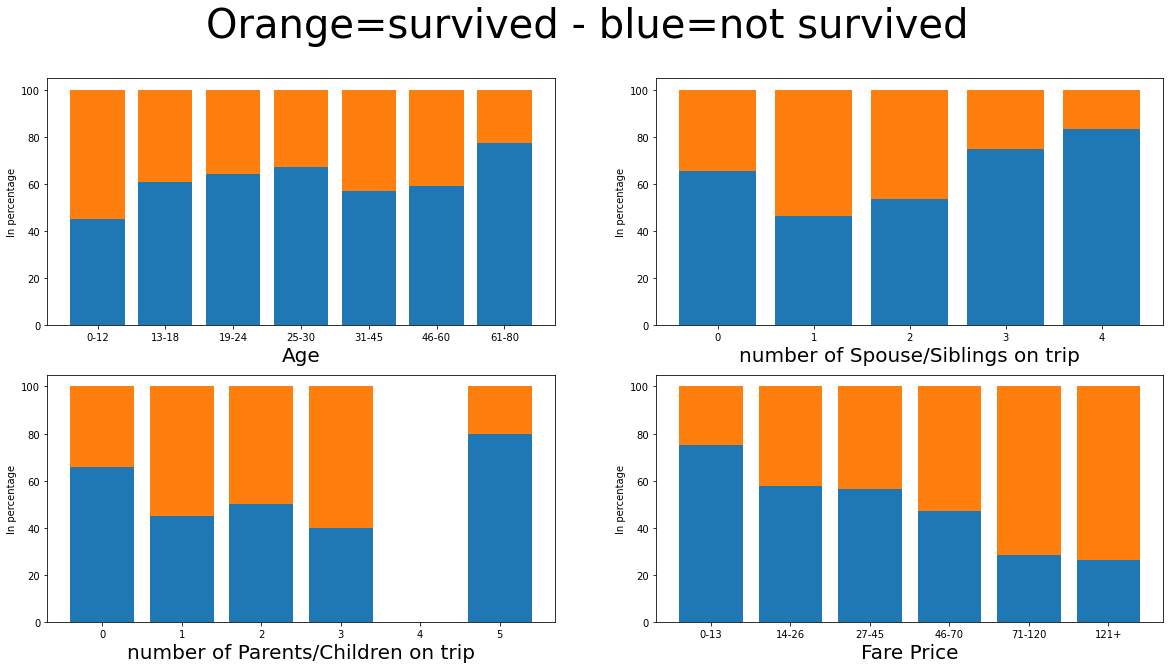

In [16]:
plt.rcParams["figure.figsize"]= (20,10)

#Create pivot table views that showdistribution of survivors vs non survivors for each selected numerical feature
agedata = pd.pivot_table(df_imputed, columns="Survived", index="Age_range", values="PassengerId", aggfunc="count")
sibspdata = pd.pivot_table(df_imputed, columns="Survived", index="SibSp", values="PassengerId", aggfunc="count")
parchpdata = pd.pivot_table(df_imputed, columns="Survived", index="Parch", values="PassengerId", aggfunc="count")
faredata = pd.pivot_table(df_imputed, columns="Survived", index="fare_range", values="PassengerId", aggfunc="count")

#add the above created pivot tables to an array so we can loop over them when plotting the charts 
num_features = [agedata, sibspdata, parchpdata, faredata]

# Create a function that helps converting the absolute numbers to percentages
def makeperc(data):
    return data.apply(lambda x: x*100/sum(x), axis=1)

#Transform this data so they become %'s making it easier to compare the distrubution between age ranges. 
for i in range(len(num_features)):  
    num_features[i]= makeperc(num_features[i])

#plot the stacked Barcharts
labels = ["Age", "number of Spouse/Siblings on trip", "number of Parents/Children on trip", "Fare Price"]
fig, ax = plt.subplots(ncols= 2, nrows = 2)
for i, ax in enumerate(ax.flat):
    ax.bar(num_features[i].index, num_features[i][0].values) 
    ax.bar(num_features[i].index, num_features[i][1].values, bottom=num_features[i][0].values)    
    ax.set_xlabel(labels[i], size=20)
    ax.set_ylabel("In percentage")

fig.suptitle("Orange=survived - blue=not survived", size=40)
    
# It looks like there is a correlation on all the 4 numerical features and survivability rate: 
# in general the older and the more siblings/spouses on the trip  the lower the chance of survival.
# Alternatively the more parents/children on the trip and the higher the fare price, the probablity for survival are increased.
# We will use all of these values in the model.

In [17]:
# Add column to dataset with logarithmic+1 fare prices which we will use to feed into the model
df_imputed["fare_log1p"] = df_imputed["Fare"].apply(np.log1p)

Text(0.5, 0.98, 'Orange=survived - blue=not survived')

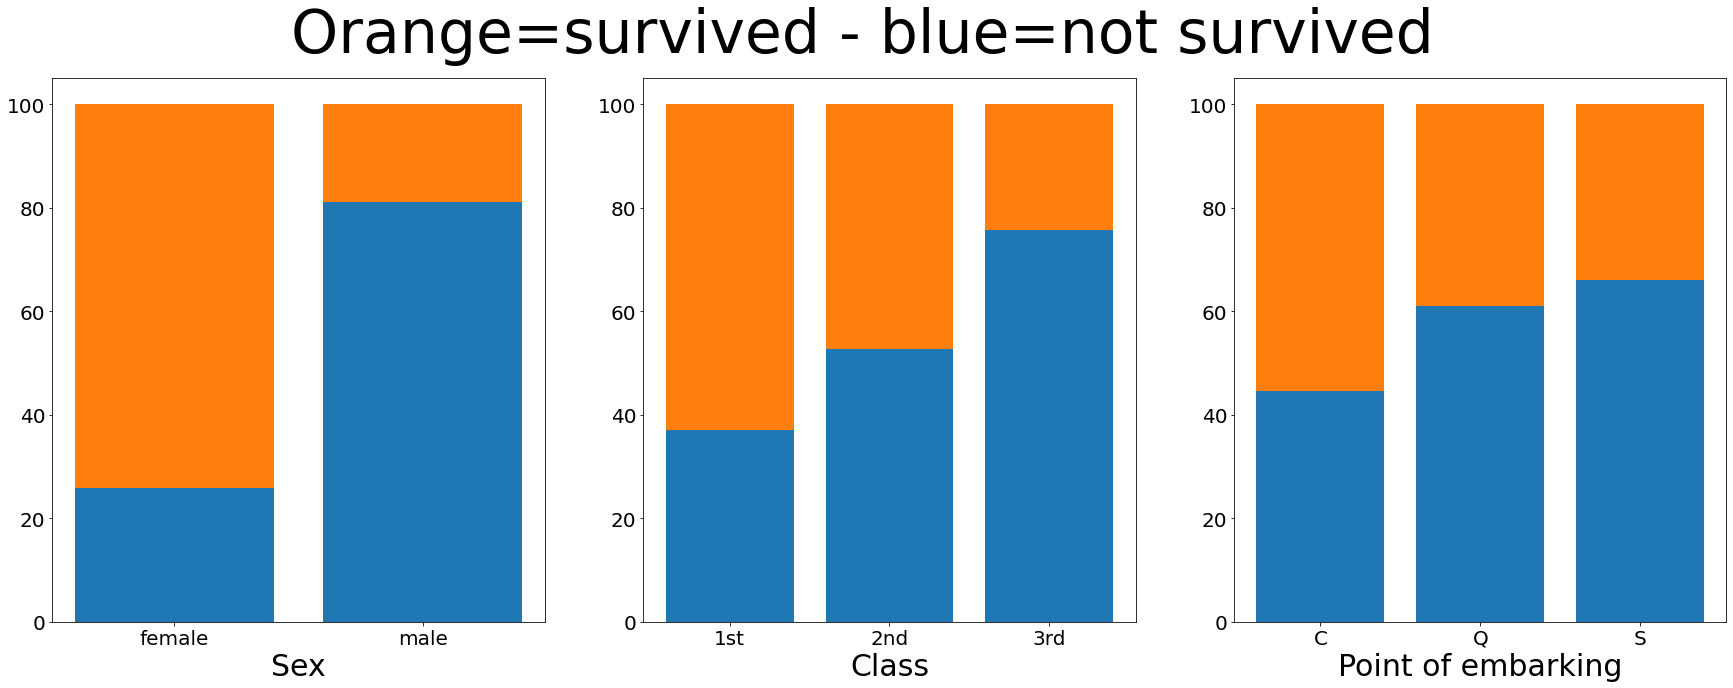

In [18]:
#Create pivot table views that showdistribution of survivors vs non survivors for each selected categorical feature
sex_survived = pd.pivot_table(df_imputed, columns="Survived", index="Sex" , values="PassengerId", aggfunc="count")
pclass_survived = pd.pivot_table(df_imputed.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}), columns="Survived", index="Pclass", values="PassengerId", aggfunc = "count")
emb_survived = pd.pivot_table(df_imputed, columns="Survived", index="Embarked", values="PassengerId", aggfunc = "count")

cat_features = [sex_survived,pclass_survived,emb_survived]
cat_labels = ["Sex", "Class", "Point of embarking"]

#Transform this data so they become %'s making it easier to compare the distrubution between data. 
for i in range(len(cat_features)):  
    cat_features[i]= makeperc(cat_features[i])
    
plt.rcParams["figure.figsize"]= (30, 10)
fig,ax = plt.subplots(ncols=3)

for i, ax in enumerate(ax.flat):
    ax.bar(cat_features[i].index, cat_features[i][0].values)
    ax.bar(cat_features[i].index, cat_features[i][1].values, bottom=cat_features[i][0].values)
    ax.set_xlabel(cat_labels[i], size=30)
    ax.tick_params(axis="both", labelsize=20)

fig.suptitle("Orange=survived - blue=not survived", size=60)

# The categorical features are painting a clear picture as to which passengers had an increased chance of survival. 

In [19]:
# Create dummies for the categorical variables 
cat_feat = ["Pclass", "Sex", "Embarked"]
cat_data = df_imputed[cat_feat]
cat_data = cat_data.replace({"Pclass": {1: "1st", 2:"2nd", 3:"3rd"}})
catdummies  = pd.get_dummies(cat_data)
catdummies.head()

,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0,0,1
1,1,0,0,1,0,1,0,0
2,0,0,1,1,0,0,0,1
3,1,0,0,1,0,0,0,1
4,0,0,1,0,1,0,0,1


In [20]:
#combine the numerical features and categorical features to use in a new dataset to be fed into the models.
num_feat = ["Age", "Parch", "SibSp", "fare_log1p"]
modeldata_X= pd.concat([df_imputed[num_feat], catdummies], axis=1)

data_model_y = df_imputed.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']

# Train the model

In [31]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Split the data in train and test sections
X_train, X_test, y_train, y_test = train_test_split(modeldata_X, data_model_y, test_size=0.25, random_state=0)

# Scale the training data
X_train = preprocessing.scale(X_train)
X_test = preprocessing.scale(X_test)

In [76]:
# As the variable we are trying to predict is a binary variable I use Logistic regression and Random Forests classifier algs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# create a LogisticRegression and RandomForestClassifier object
logistic = LogisticRegression(random_state=0)
#Increasing the n_estimators beyond 14 does not substantially or reliably increase the accuracy of the model. 
rfc = RandomForestClassifier(n_estimators=14, random_state=0)

# Fit the training data to each object
logistic.fit(X_train, y_train)
rfc.fit(X_train, y_train)

# Create lists of predicted values for each algorithm
logpred= logistic.predict(X_test)
rfcpred = rfc.predict(X_test)

# Calculate the score for both models
logscore = logistic.score(X_test, y_test)
rfcscore = rfc.score(X_test, y_test)

# Evaluate

In [53]:
#Check the results
print("Logistic score                      "  + str(logscore))
print("RandomForestClassification score    "  + str(rfcscore))

Logistic score                      0.8161434977578476
RandomForestClassification score    0.8251121076233184


In [ ]:
# Seeing that the RandomForest Classifier is slightly more accurate we plot the graphs based of of this

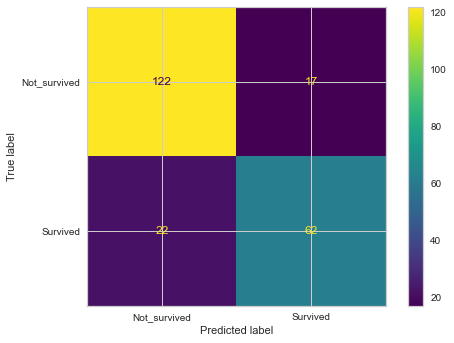

In [74]:
# Plot the confusion Matrix
from sklearn.metrics import plot_confusion_matrix, accuracy_score
plot_confusion_matrix(rfc, X_test, y_test)

C:\Users\vanopstala\Programs\Anaconda3\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


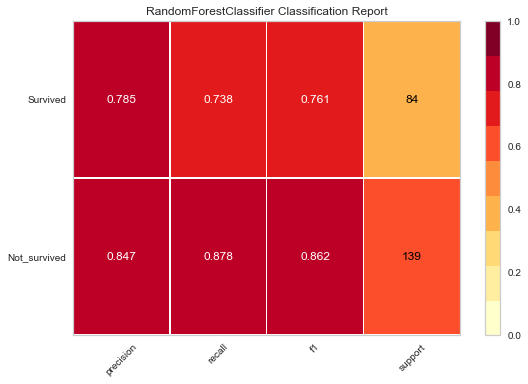

In [78]:
# Plot the classification_report
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(rfc, classes=['Not_survived','Survived'], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()             # Draw/show the data

In [24]:
# Lets check and compare a sample of the datasets actual and predicted values
check = pd.DataFrame({"Actual": y_test, "Logistic Predicted": logpred, "ForestClass": rfcpred})
check.sample(30)

,Actual,Logistic Predicted,ForestClass
561,Not_survived,Not_survived,Not_survived
838,Survived,Not_survived,Survived
214,Not_survived,Not_survived,Not_survived
500,Not_survived,Not_survived,Not_survived
101,Not_survived,Not_survived,Not_survived
317,Not_survived,Not_survived,Not_survived
252,Not_survived,Not_survived,Not_survived
352,Not_survived,Not_survived,Not_survived
609,Survived,Survived,Survived
666,Not_survived,Not_survived,Not_survived


# Conclusion